In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import get_hex
from highlight_text import fig_text, ax_text
from matplotlib.font_manager import FontProperties

df = pd.read_csv('disaster-events.csv')

def remove_agg_rows(entity: str):
   if entity.lower().startswith('all disasters'):
      return False
   else:
      return True
df = df.replace('Dry mass movement', 'Drought')
df = df[df['Entity'].apply(remove_agg_rows)]
df = df[~df['Entity'].isin(['Fog', 'Glacial lake outburst flood'])]
df = df.pivot_table(index='Entity', columns='Year', values='Disasters').T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df[df.index <= 2023]
df = df.interpolate(axis=1)
df.sum(axis=1)

Year
1960     56.0
1961     37.5
1962     36.0
1963     42.0
1964     76.5
        ...  
2019    413.0
2020    407.0
2021    439.0
2022    439.0
2023    409.0
Length: 64, dtype: float64

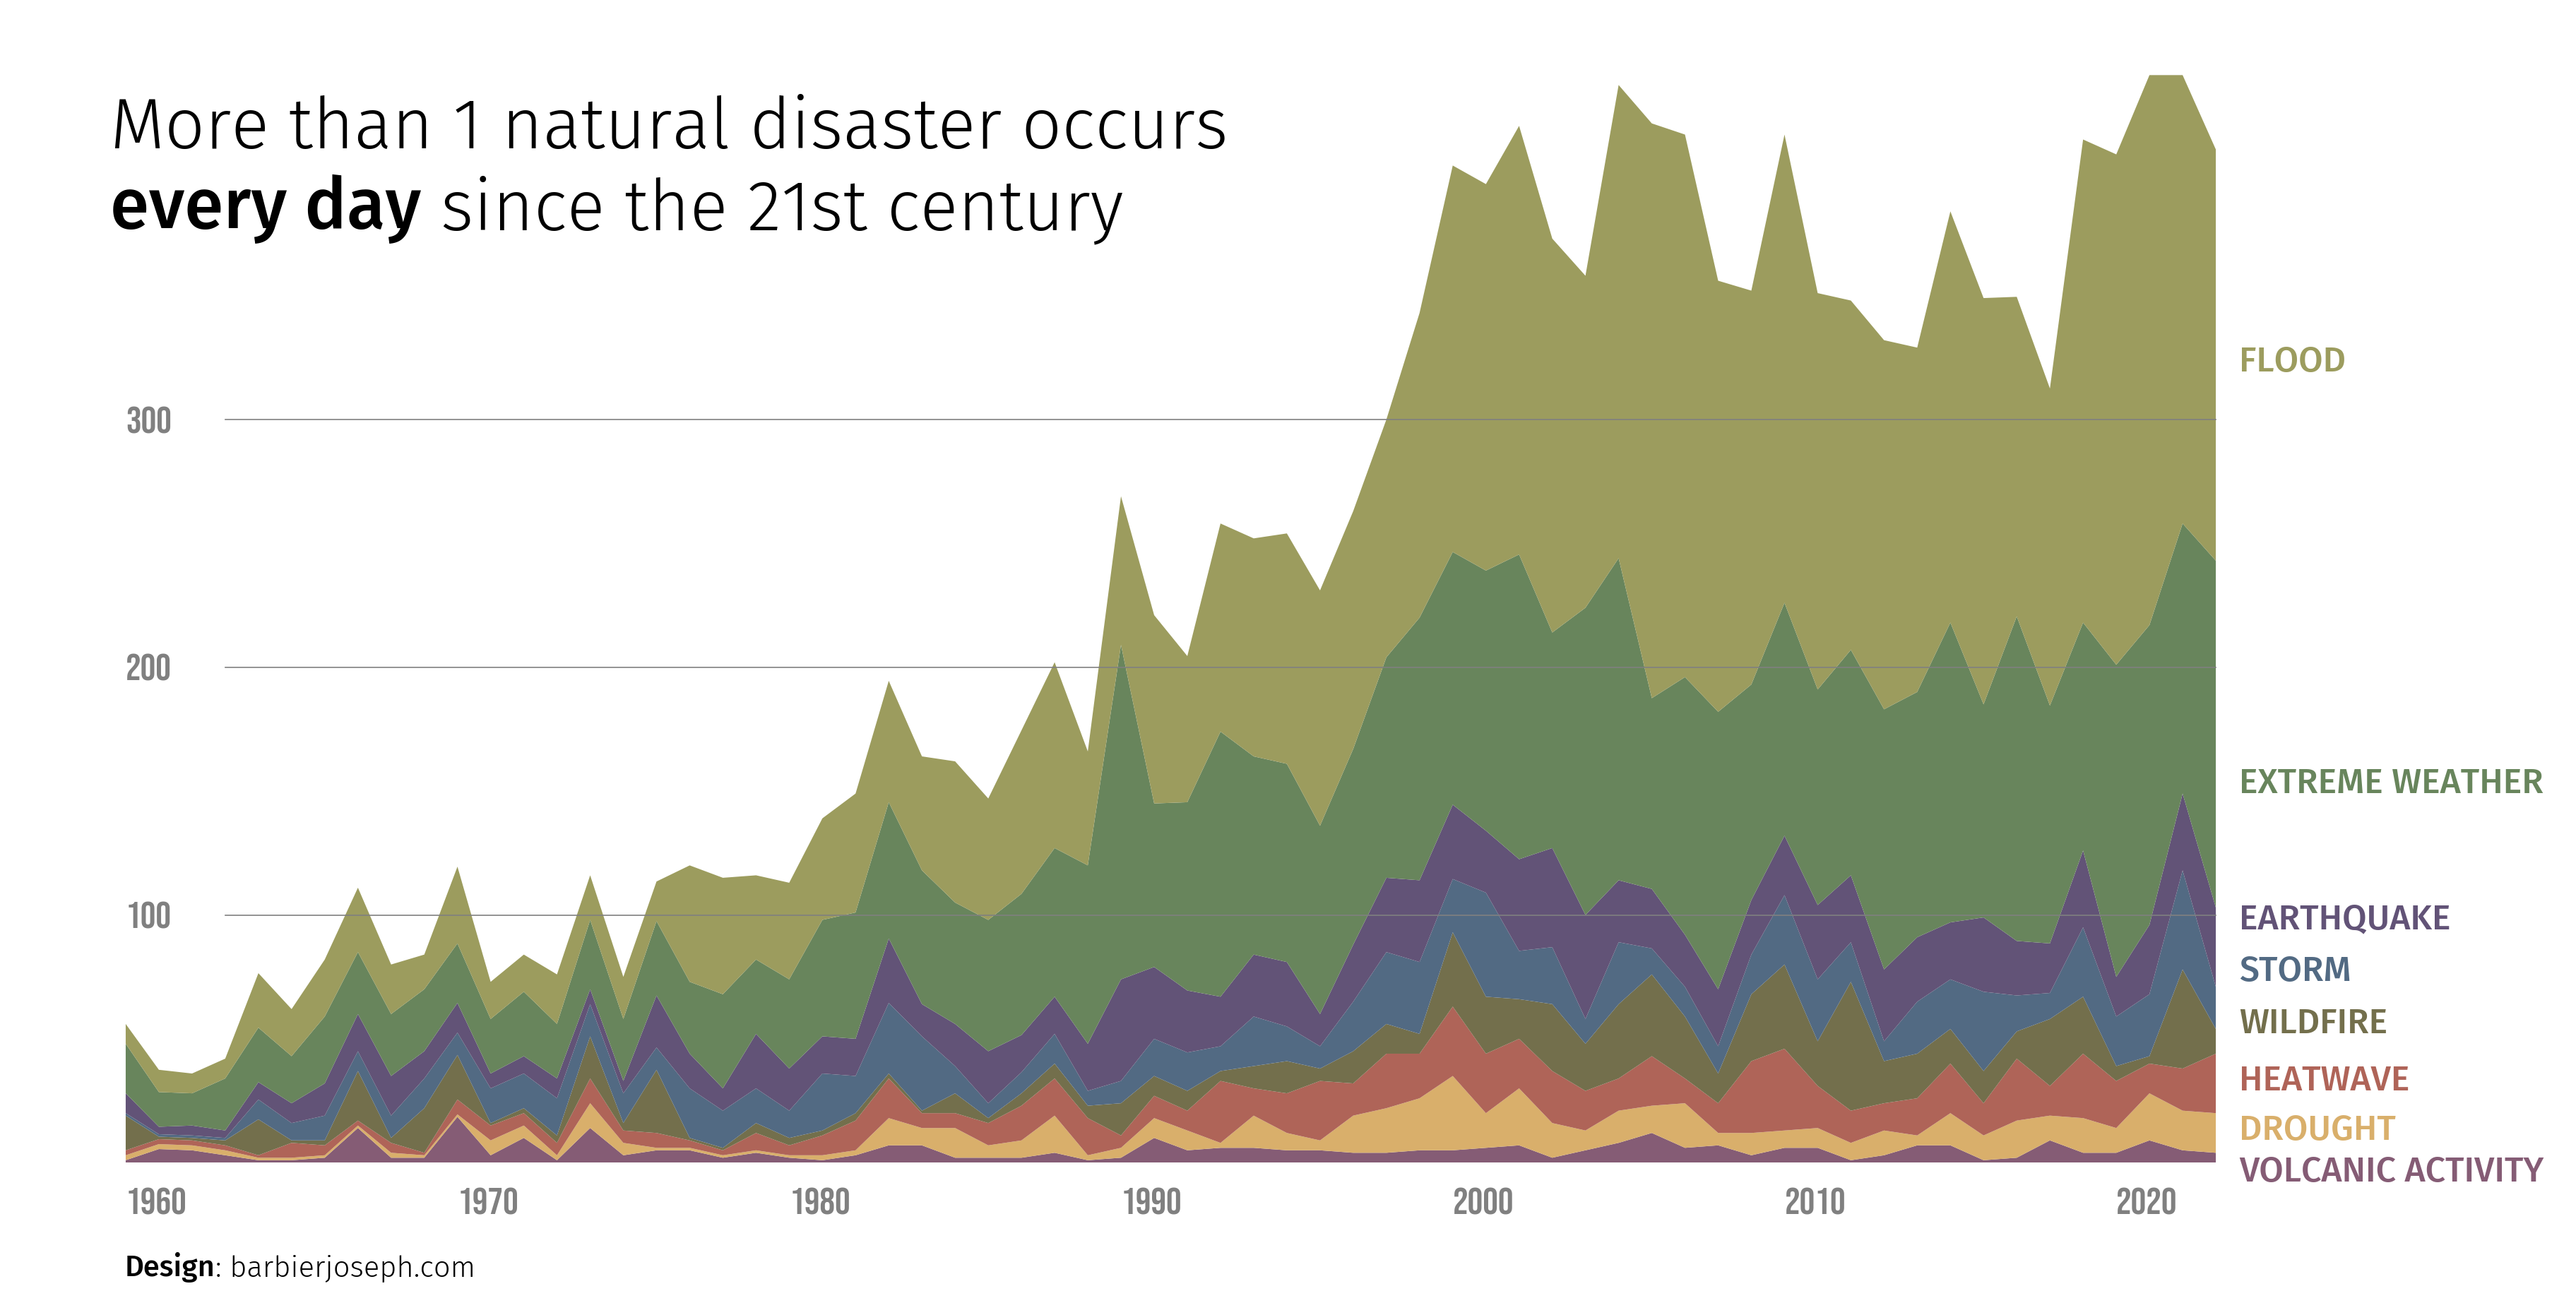

In [221]:
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

columns = df.sum().sort_values().index.to_list()
colors = get_hex('Antique')

x = df.index
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.155, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      font=font, fontsize=13,
      color='grey'
   )

for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      font=font, fontsize=13,
      color='grey'
   )
   # horizontal line
   ax.plot([1963, 2023], [value, value], color='grey', lw=.4)

text = """
The predominant calamity is <Flood>, trailed closely by
<Extreme weather> events.
Other significant natural phenomena, though less common,
merit attention: <Earthquake>, <Storm>, <Wildfire>, <Heatwave>,
<Drought>, and <Volcanic activity>.
"""
# fig_text(
#    x=.155, y=.72, s=text, fontsize=14,
#    ha='left', va='top', color='black',
#    font=other_font, fig=fig,
#    highlight_textprops=[
#       {'color': colors[7], 'font': other_bold_font},
#       {'color': colors[6], 'font': other_bold_font},
#       {'color': colors[5], 'font': other_bold_font},
#       {'color': colors[4], 'font': other_bold_font},
#       {'color': colors[3], 'font': other_bold_font},
#       {'color': colors[2], 'font': other_bold_font},
#       {'color': colors[1], 'font': other_bold_font},
#       {'color': colors[0], 'font': other_bold_font}
#    ]
# )

fig_text(
   s='<Design>: barbierjoseph.com', x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font}]
)


ax_text(x=2023.7, y=330, s='Flood'.upper(), color=colors[7], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=160, s='Extreme weather'.upper(), color=colors[6], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=105, s='Earthquake'.upper(), color=colors[5], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=84, s='Storm'.upper(), color=colors[4], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=63, s='Wildfire'.upper(), color=colors[3], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=40, s='Heatwave'.upper(), color=colors[2], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=20, s='Drought'.upper(), color=colors[1], font=other_bold_font, fontsize=12)
ax_text(x=2023.7, y=3, s='Volcanic activity'.upper(), color=colors[0], font=other_bold_font, fontsize=12)

plt.savefig('natural-disasters.png', bbox_inches='tight', dpi=300)
plt.show()